In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('database/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# NaN Values

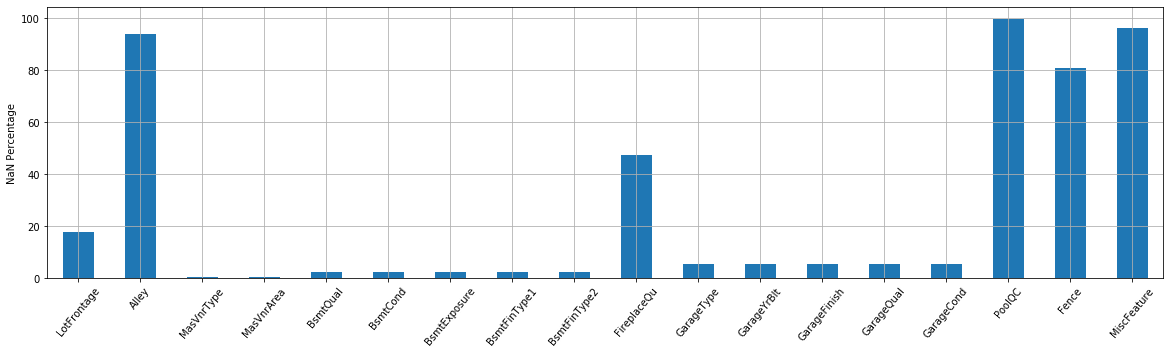

In [3]:
def plot_nan_values(df):
    global nan_features
    nan_features = df.columns[df.isnull().sum() > 1]
    
    global nan_percentage_of_features
    nan_percentage_of_features = df[nan_features].isnull().sum()/len(df)*100
    nan_percentage_of_features.plot(kind='bar', figsize=(20, 5))

    plt.ylabel('NaN Percentage')
    plt.xticks(rotation=50)
    plt.grid(1)
    
    
plot_nan_values(data)

As we can see, there are 5 features with Nan Percentage around and above 50. 

**PROCESSING** : But a few(4) features have ridiculously high Nan Percentages, above 80. We'll be completely dropping them.

In [4]:
THRESHOLD = 80

features_higher_than_threshold_nan = nan_percentage_of_features[nan_percentage_of_features>THRESHOLD]
data = data.drop(columns=features_higher_than_threshold_nan.index)

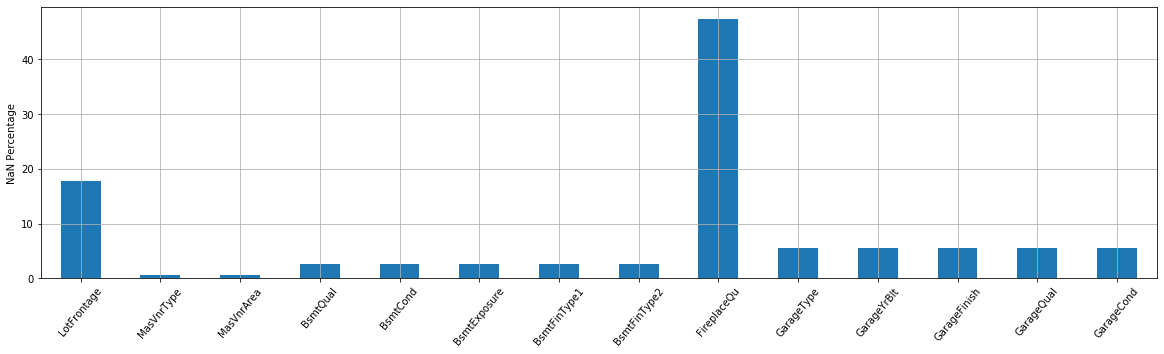

In [5]:
plot_nan_values(data)

Now, we'll see the relationship between FireplaceQu/LotFrontage and SalePrice

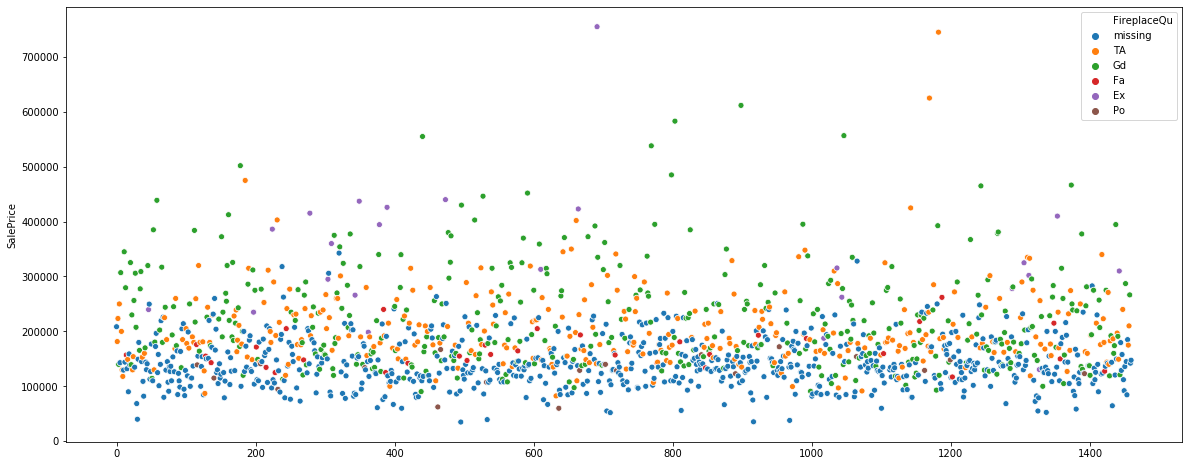

In [6]:
df = data.copy()
df['FireplaceQu'] = data['FireplaceQu'].fillna('missing')

plt.figure(figsize=(20, 8))
sns.scatterplot(x=data.index, y='SalePrice', data=df, hue='FireplaceQu')

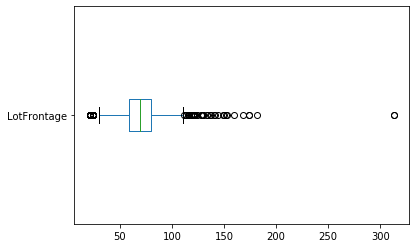

In [7]:
data['LotFrontage'].plot(kind='box', vert=False)

**PROCESSING** : As we can see..

* FireplaceQu : most of the NaN values lies within the range 100k-200k. We can use this information, thus, converting the NaN Labels into a category
* LotFrontage : there are a lot of outliers in LotFrontage, so, replacing the NaN with MEDIAN.

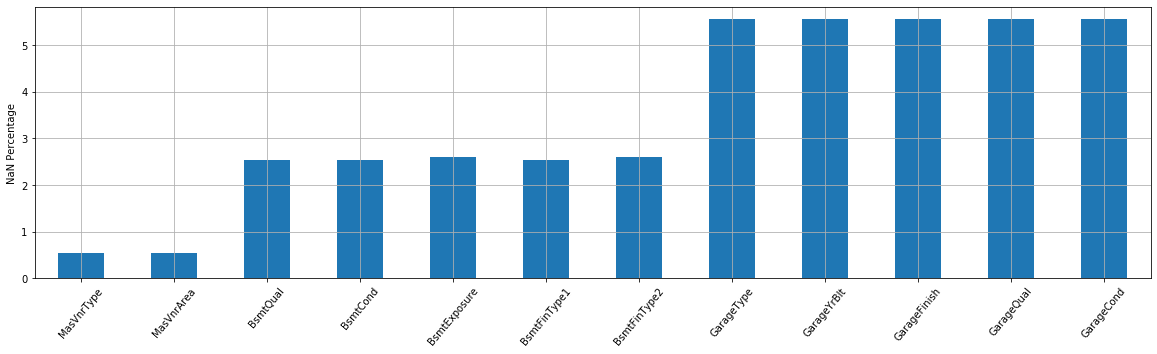

In [8]:
data['FireplaceQu'].fillna('missing', inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

plot_nan_values(data)

Now, our Nan values are under 5% per category, now, we'll check for RARE categories and merge them with the NaN

In [9]:
cat_features = [f for f in data.columns if data[f].dtype=='O']
num_features = [f for f in data.columns if data[f].dtype!='O' and f not in ['Id', 'SalePrice']]

print('Total number of Categorical Features :', len(cat_features))
print('Total number of Numerical Features   :', len(num_features))

Total number of Categorical Features : 39
Total number of Numerical Features   : 36


In [14]:
THRESHOLD = 5

df = data.copy()

for f in cat_features:
    df[f].fillna('other', inplace=True)
    frequency_percent = df.groupby(f)[f].count()/len(data) * 100
#     print(frequency_percent, '\n')
    for val in frequency_percent[frequency_percent<THRESHOLD].index:
        df[f] = np.where(df[f] == val, 'other', df[f])

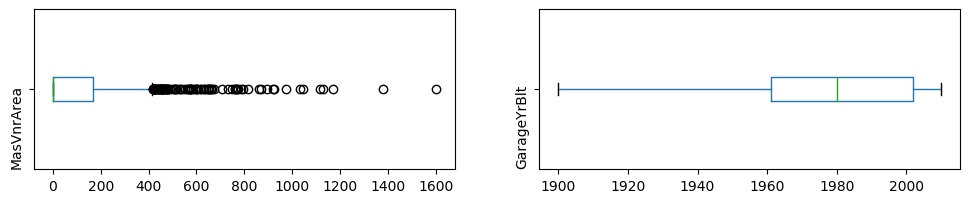

In [15]:
num_nan_features = [f for f in num_features if df[f].isnull().sum() >= 1]

plt.figure(figsize=(25, 25), dpi=100)
for idx, f in enumerate(num_nan_features):
    plt.subplot(10, 4, idx+1)
    df[f].plot(kind='box', vert=False)
    plt.yticks(rotation=90)

Clearly we can see that MasVnrArea has a lot of outliers and GarageYrBlt does not.
Thus..

In [16]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

In [19]:
print('Total Number of NaN Values in our dataset now :', df.isnull().sum().sum())
data = df.copy()

Total Number of NaN Values in our dataset now : 0


In [20]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,other,Gtl,other,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,other,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,other,None,0.0,TA,TA,BrkTil,TA,other,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,other,Gtl,other,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Relationship between Features and Price

In [ ]:
cat_features = [f for f in data.columns if data[f].dtype=='O']
num_features = [f for f in data.columns if data[f].dtype!='O' and f not in ['Id', 'SalePrice']]

print('Total number of Categorical Features :', len(cat_features))
print('Total number of Numerical Features   :', len(num_features))

In [ ]:
# plt.figure(figsize=(25, 25), dpi=100)
# for idx, f in enumerate(cat_features):
#     plt.subplot(10, 4, idx+1)
#     sns.boxplot(x=f, y='SalePrice', data=df)
# #     plt.title(f)
# #     plt.legend(1)
#     plt.xticks(rotation=80)